<a href="https://colab.research.google.com/github/NNoorFatima/Machine-Learning/blob/main/ML_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seoul Bike DataSet




## Linear Regression

* there is a line of best fit--> y = b0 + b1x [simple linear regression]
* there is error called as residual
* **|actual_val - pred_val|**= residual/error
* *sum of all residuals* is tried to decreased with the line of best fit choosen
* y= b0 + b1x1 + b2 x2 + .. + bnxn [multiple value regression]
* assumptions regarding this model
  * Linear
  * Independent: all data values/samples dont rely on one another and hence are independent
  * Nomality: has to do with the residual plot; residuals show follow a normal distribution
  * Homoskedasticity: variance should be same among points;spread of the points is same




### Mean absolute error (MAE)
  * average of all sum of residuals
### Mean squared error (MSE)
  * Average of sum of all residuals square
  * helps with differentiability
### Root Mean Squared error (RMSE)
  * Square root of Average of sum of all residuals square
### R^2 coefficient of determination
  * r^2= 1- RSS/TSS
  * RSS = sum of squared residuals
      * sum of (actual_value - pred_val)
  * TSS = Total sum of squares
      * sum of (y_i - y_mean)
  * when r^2 is near to 1 means good predictor
  
    

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression


In [39]:
cols =['rented_bike_count', 'hour','temp','humidity','windspeed','visibility', 'dew_point_temp','solar_rad','rainfall','snowfall','functional_day']
#df = pd.read_csv('SeoulBikeData.csv', encoding='latin1', names= cols)

df = pd.read_csv('SeoulBikeData.csv', encoding='latin1').drop(['Date','Holiday','Seasons'], axis=1)
df.columns=cols
df["functional_day"]= (df["functional_day"]=="Yes").astype(int)
#finding the samples where time is 12
df= df[df["hour"]==12]
df= df.drop(["hour"],axis=1)
df.head()


,rented_bike_count,temp,humidity,windspeed,visibility,dew_point_temp,solar_rad,rainfall,snowfall,functional_day
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


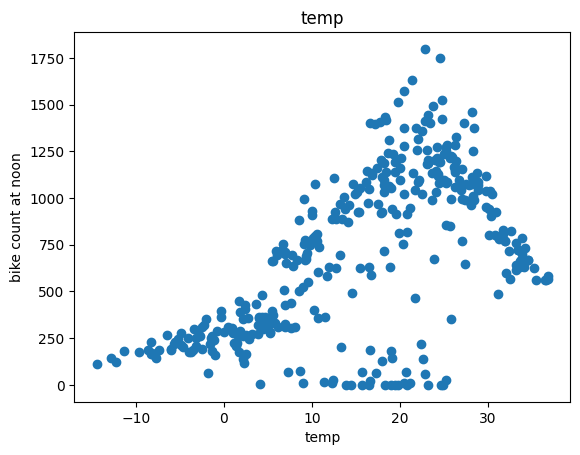

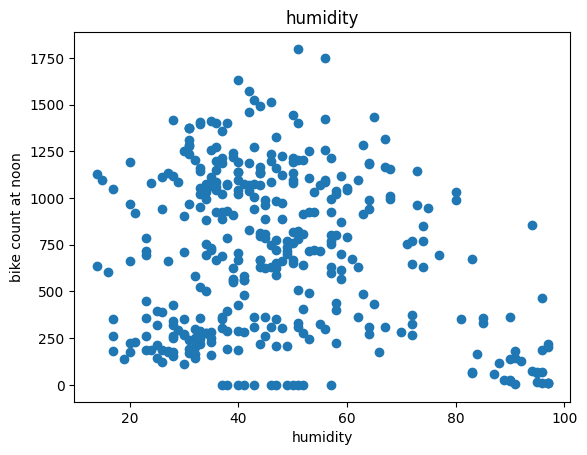

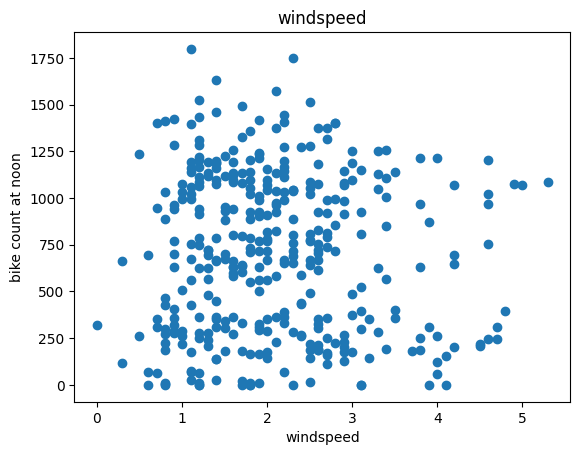

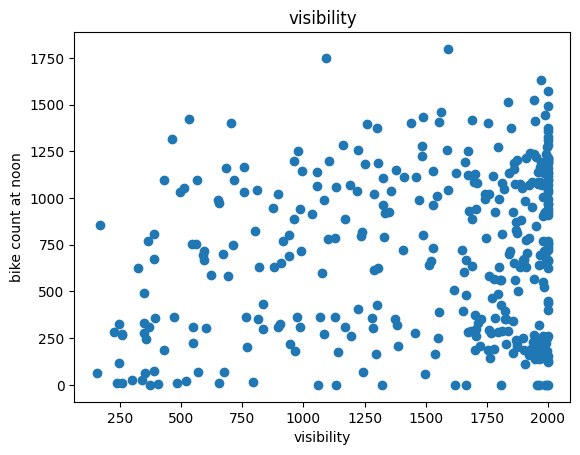

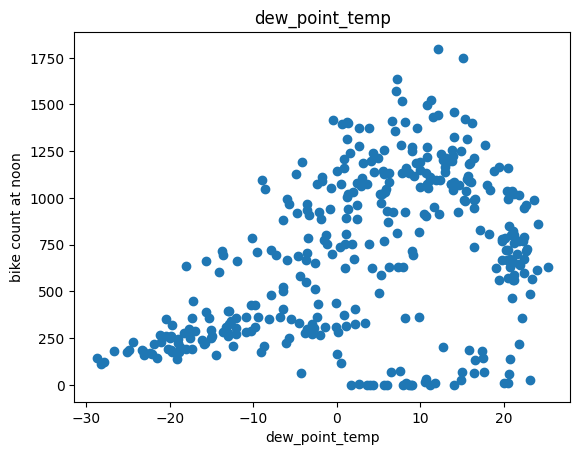

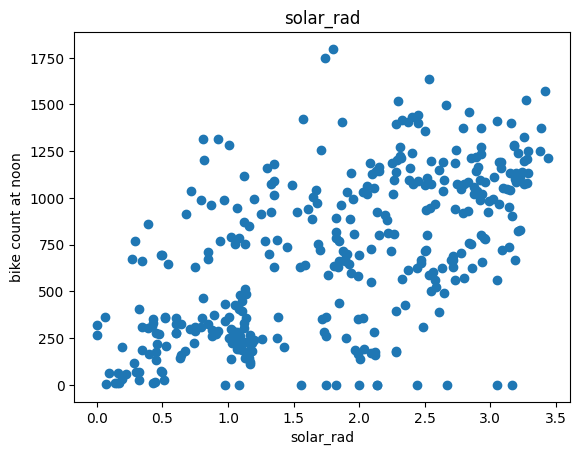

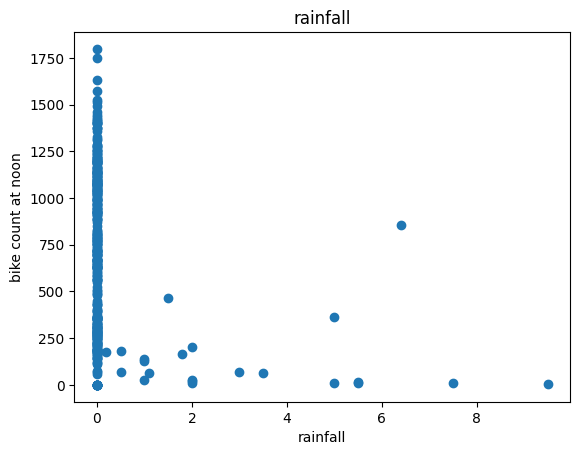

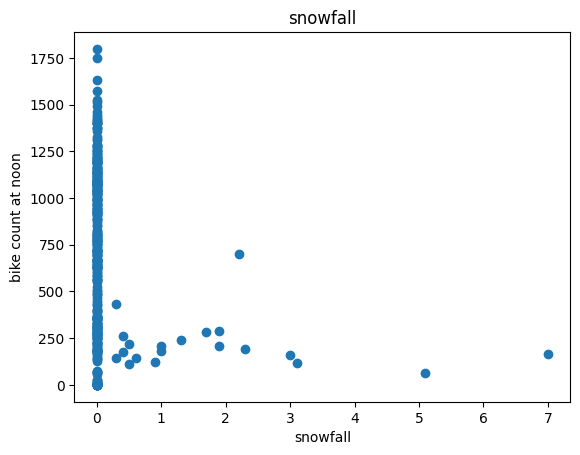

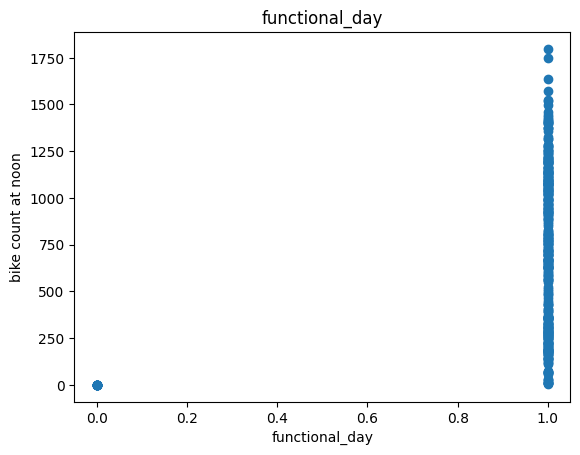

In [40]:
for label in df.columns[1:]:
  plt.scatter(df[label],df["rented_bike_count"])
  plt.title(label)
  plt.ylabel("bike count at noon")
  plt.xlabel(label)
  plt.show()

In [41]:
#based on the scatter plot remove attributes that are of no use
df= df.drop(["windspeed","visibility","functional_day"],axis=1)
df.head()

,rented_bike_count,temp,humidity,dew_point_temp,solar_rad,rainfall,snowfall
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


In [42]:
#divide data for training, testing and validation

In [43]:
train, val, test= np.split(df.sample(frac=1),[int(0.6* len(df)), int(0.8*len(df))])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [51]:
def get_xy(df, y_label, x_labels=None):
  df= copy.deepcopy(df)
  if not x_labels:
    X= df[[c for c in df.columns if c!= y_label]].values
  else:
      if len(x_labels)== 1:
          X= df[x_labels[0]].values.reshape(-1,1)
      else:
        X= df[x_labels].values
  y = df[y_label].values.reshape(-1,1)
   # creates an hosrizontal stack
  data = np.hstack((X, y))  # Wrap X and y in a tuple

  return data,X,y



In [54]:
_,X_train, y_train = get_xy(train, "rented_bike_count", x_labels=["temp"])
_,X_val, y_val = get_xy(val, "rented_bike_count", x_labels=["temp"])
_,X_test, y_test = get_xy(test, "rented_bike_count", x_labels=["temp"])
